# 1. Install and Import Dependencies

In [5]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0)
ERROR: No matching distribution found for torch==1.8.1+cu111

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.12 MiB | 6.67 MiB/s, done.
Resolving deltas: 100% (11858/11858), done.


In [7]:
!cd yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/seunghyunlee/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-25 Python-3.12.4 torch-2.3.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [5]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [6]:
results = model(img)
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 168.9ms pre-process, 73.1ms inference, 0.7ms NMS per image at shape (1, 3, 448, 640)


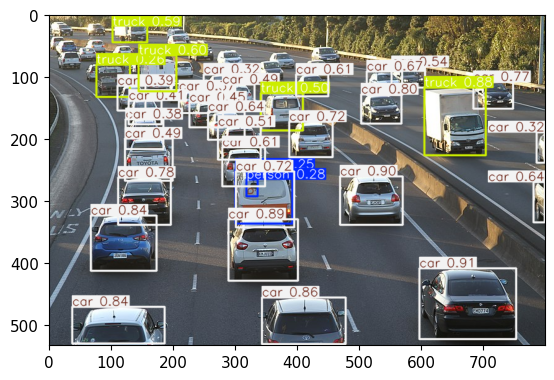

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [16]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [16]:
import uuid   # Unique identifier
import os
import time

In [25]:
IMAGES_PATH = "newdata/images"  # Set your actual image directory
os.makedirs(IMAGES_PATH, exist_ok=True)  # Ensure directory exists

number_imgs = 5

In [32]:
import cv2
import os
import time
import uuid

# Define Image Save Path


labels = ['open', 'closed']  # Labels for image collection
number_imgs = 2  # Number of images per label

# Initialize Webcam
cap = cv2.VideoCapture(0)  # Open camera (use index 0 for default camera)
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Loop through labels
for label in labels:
    print(f'Collecting images for {label}')
    time.sleep(2)  # Short delay before starting collection

    # Loop through image range
    for img_num in range(number_imgs):
        print(f'Collecting images for {label}, image number {img_num}')

        # Capture frame
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image.")
            continue

        # Generate unique image name
        imgname = os.path.join(IMAGES_PATH, f"{label}.{uuid.uuid1()}.jpg")

        # Save image
        cv2.imwrite(imgname, frame)
        print(f"Saved {imgname}")

        # Display the frame
        cv2.imshow('Image Collection', frame)

        # Wait and allow exit with 'q'
        if cv2.waitKey(2000) & 0xFF == ord('q'):  # Matches 2-second sleep
            print("Exit requested. Stopping image collection.")
            cap.release()
            cv2.destroyAllWindows()
            exit()

cap.release()
cv2.destroyAllWindows()

Saved newdata/images/open.f5d04484-f94e-11ef-99d3-1a199e3d5bdc.jpg
Saved newdata/images/open.f70a3968-f94e-11ef-99d3-1a199e3d5bdc.jpg
Saved newdata/images/closed.f971ddd2-f94e-11ef-99d3-1a199e3d5bdc.jpg
Saved newdata/images/closed.faa7ddaa-f94e-11ef-99d3-1a199e3d5bdc.jpg


In [31]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

newdata/images/open.eab3d9ee-f94e-11ef-99d3-1a199e3d5bdc.jpg


In [21]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)  # Save the image

        print(imgname)   

data/images/awake.db06b13e-f94d-11ef-99d3-1a199e3d5bdc.jpg
data/images/awake.db06bde6-f94d-11ef-99d3-1a199e3d5bdc.jpg
data/images/awake.db06c07a-f94d-11ef-99d3-1a199e3d5bdc.jpg
data/images/awake.db06c2d2-f94d-11ef-99d3-1a199e3d5bdc.jpg
data/images/awake.db06c4b2-f94d-11ef-99d3-1a199e3d5bdc.jpg
data/images/drowsy.db06c6f6-f94d-11ef-99d3-1a199e3d5bdc.jpg
data/images/drowsy.db06c8d6-f94d-11ef-99d3-1a199e3d5bdc.jpg
data/images/drowsy.db06d29a-f94d-11ef-99d3-1a199e3d5bdc.jpg
data/images/drowsy.db06d4ca-f94d-11ef-99d3-1a199e3d5bdc.jpg
data/images/drowsy.db06d6be-f94d-11ef-99d3-1a199e3d5bdc.jpg


In [13]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2097 (delta 0), reused 0 (delta 0), pack-reused 2093 (from 2)
Receiving objects: 100% (2097/2097), 237.14 MiB | 4.32 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [14]:
!pip install pyqt5 lxml --upgrade 
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Using cached PyQt5-5.15.11-cp38-abi3-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached PyQt5_sip-12.17.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (472 bytes)
  Using cached PyQt5_Qt5-5.15.16-py3-none-macosx_11_0_arm64.whl.metadata (536 bytes)
Using cached PyQt5-5.15.11-cp38-abi3-macosx_11_0_arm64.whl (6.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 29.4 MB/s eta 0:00:0000:0100:01
Using cached PyQt5_Qt5-5.15.16-py3-none-macosx_11_0_arm64.whl (37.1 MB)
Using cached PyQt5_sip-12.17.0-cp312-cp312-macosx_10_9_universal2.whl (124 kB)
  Attempting uninstall: lxml
    Found existing installation: lxml 5.2.2
    Uninstalling lxml-5.2.2:
      Successfully uninstalled lxml-5.2.2

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [15]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: Ultralytics requirement ['thop>=0.1.1'] not found, attempting AutoUpdate...

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

requirements: AutoUpdate success ✅ 2.0s, installed 1 pac

# 6. Load Custom Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\User/.cache\torch\hub\master.zip
YOLOv5  2021-7-11 torch 1.8.1+cu111 CUDA:0 (GeForce RTX 2070 SUPER, 8192.0MB)

Fusing layers... 
Model Summary: 224 layers, 7097062 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [11]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [12]:
results = model(img)

In [13]:
results.print()

image 1/1: 480x640 1 awake
Speed: 16.0ms pre-process, 11.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


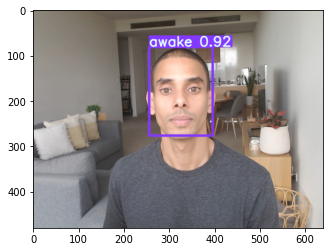

In [14]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()